In [120]:
import warnings
warnings.filterwarnings('ignore')

- SibSp: タイタニック号に乗っている兄弟/配偶者の数
- Parch: タイタニック号に乗っている親/子供の数
- Cabin: キャビン番号
- Embarked: 乗船港

In [121]:
import pandas as pd

df = pd.read_csv("./data/input/train.csv", index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [122]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [123]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [124]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [139]:
# 最初に実行する前処理
df2 = df.copy(deep=True)

# 名前は分類に必要ないので削除
df2.drop(columns='Name', inplace=True)

# Cabinは Nanが多いので一旦削除
df2.drop(columns='Cabin', inplace=True)

# Ticketもバラバラなので一旦削除
# len(df["Ticket"].unique()) => 681
df2.drop(columns='Ticket', inplace=True)

# 男女をダミー変数化
# df2['Sex'].unique() => male , female
df2['Sex'] = df2['Sex'].apply(lambda sex: 1 if sex=="male" else 0)

# One-Hot-Encoding: Embarked
df2 = pd.get_dummies(df2)

# Nanは中央値に変換
df2.fillna(df2.median(), inplace=True)

df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,0,0
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,0,0,1
888,1,1,0,19.0,0,0,30.0000,0,0,1
889,0,3,0,28.0,1,2,23.4500,0,0,1


In [144]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# トレーニングデータを説明変数(X)と目的変数(y)に分割

X = df2.drop(columns="Survived")
y = df2[["Survived"]]

# 学習用データと検証用データに分割
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=None)

# 標準化
std_scl = StandardScaler()
std_scl.fit(X_train)
X_train = std_scl.transform(X_train)
X_test = std_scl.transform(X_test)

# 学習・テスト
svm = SVC(kernel='linear', random_state=None, C=0.1)
svm.fit(X_train, y_train)
svm.score(X_test,y_test)

0.7873134328358209

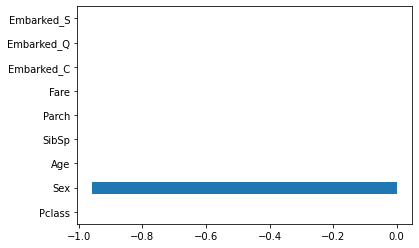

In [145]:
# 特徴量の確認
pd.Series(svm.coef_[0], index=X.columns).plot(kind='barh');